### Libraries

In [5]:
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer

### Import training data

In [6]:
df = pd.read_csv('../data/training.csv')
display(df.head())
print('shape', df.shape)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_540,Feature_541,Feature_542,Feature_543,Feature_544,Feature_545,Feature_546,Feature_547,Feature_548,Target
0,0.144231,0.105263,0.9000,0.66665,0.93750,0.0,0.0,NaN,NaN,0.56250,...,0.216696,0.0000,0.000000,Orcs,0.3,0.0,0.294118,0.111111,0.0,0
1,0.115385,0.000000,0.8750,0.00000,0.94000,0.0,0.0,0.0,0.028192,0.56000,...,0.058615,0.0105,0.000000,Goblins,0.1,1.0,0.235294,0.222222,1.0,0
2,0.076923,0.000000,0.8750,0.50000,0.86665,0.0,1.0,0.0,0.027882,0.63335,...,0.000000,0.0000,0.263682,Uruk-hai,0.4,0.0,0.117647,0.222222,0.0,0
3,0.076923,0.000000,0.8750,0.00000,0.71430,0.0,0.0,0.0,NaN,0.78570,...,0.000000,0.0000,0.000000,Goblins,0.0,1.0,0.117647,0.222222,0.0,0
4,0.528846,0.263158,0.9375,0.87500,0.93135,0.0,1.0,0.0,0.027882,0.56865,...,0.033748,0.0130,0.094527,Uruk-hai,0.3,1.0,0.117647,0.666667,1.0,0


shape (2563, 549)


In [7]:
X = df.drop('Target', axis=1)
y = df['Target'].copy()

print('X:', X.shape, 'y:', y.shape)

X: (2563, 548) y: (2563,)


### Quick Hot Encoder for categorical values

In [8]:
# Work with non-numeric features
X_objects_features = X.select_dtypes(include=['object'])

X_encoded = pd.get_dummies(X_objects_features)
display(X_encoded.head())


,Feature_82_Barad-dur Log,Feature_82_Beleriand Ballad,Feature_82_Bree Chronicle,Feature_82_Dale Daily,Feature_82_Erebor Echo,Feature_82_Fangorn Newspaper,Feature_82_Harad Herald,Feature_82_Isengard Report,Feature_82_Laketown Lantern,Feature_82_Lindon Legends,...,Feature_543_Nazgul,Feature_543_Orcs,Feature_543_Ringwraiths,Feature_543_Sauron's Sorcerers,Feature_543_Trolls,Feature_543_Uruk-hai,Feature_543_Vampires,Feature_543_Wargs,Feature_543_Watchers in the Water,Feature_543_Werewolves
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [9]:
X = pd.concat([X.select_dtypes(exclude='object'), X_encoded], axis=1)
display(X.head())

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_543_Nazgul,Feature_543_Orcs,Feature_543_Ringwraiths,Feature_543_Sauron's Sorcerers,Feature_543_Trolls,Feature_543_Uruk-hai,Feature_543_Vampires,Feature_543_Wargs,Feature_543_Watchers in the Water,Feature_543_Werewolves
0,0.144231,0.105263,0.9000,0.66665,0.93750,0.0,0.0,NaN,NaN,0.56250,...,False,True,False,False,False,False,False,False,False,False
1,0.115385,0.000000,0.8750,0.00000,0.94000,0.0,0.0,0.0,0.028192,0.56000,...,False,False,False,False,False,False,False,False,False,False
2,0.076923,0.000000,0.8750,0.50000,0.86665,0.0,1.0,0.0,0.027882,0.63335,...,False,False,False,False,False,True,False,False,False,False
3,0.076923,0.000000,0.8750,0.00000,0.71430,0.0,0.0,0.0,NaN,0.78570,...,False,False,False,False,False,False,False,False,False,False
4,0.528846,0.263158,0.9375,0.87500,0.93135,0.0,1.0,0.0,0.027882,0.56865,...,False,False,False,False,False,True,False,False,False,False


In [10]:
# SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Can use 'mean', 'median', 'most_frequent', or an constant value

# Apply SimpleImputer
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

#### Corr

In [11]:
# Calculate the correlation between each column of main_df and target_column
correlations = X.corrwith(y)

Feature_1                            0.047761
Feature_2                           -0.026763
Feature_3                            0.001985
Feature_4                           -0.030830
Feature_5                            0.000615
                                       ...   
Feature_543_Uruk-hai                 0.028460
Feature_543_Vampires                -0.011940
Feature_543_Wargs                    0.015863
Feature_543_Watchers in the Water   -0.006891
Feature_543_Werewolves              -0.011716
Length: 734, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


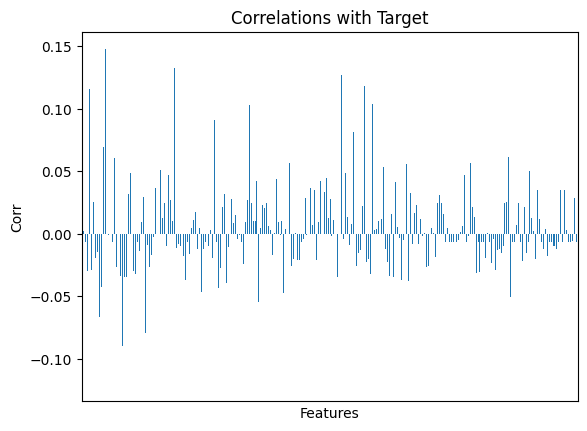

In [15]:
import matplotlib.pyplot as plt

# Correlations with Target
correlations.plot(kind='bar')
plt.title('Correlations with Target')
plt.xlabel('Features')
plt.xticks([])
plt.ylabel('Corr')
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize data
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

data_standardized


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_543_Nazgul,Feature_543_Orcs,Feature_543_Ringwraiths,Feature_543_Sauron's Sorcerers,Feature_543_Trolls,Feature_543_Uruk-hai,Feature_543_Vampires,Feature_543_Wargs,Feature_543_Watchers in the Water,Feature_543_Werewolves
0,0.415473,0.899037,0.638213,0.566170,0.784154,-0.019757,-1.300856,NaN,NaN,0.343520,...,-0.272365,5.682052,-0.272365,-0.019757,-0.297191,-0.448365,-0.034233,-0.262312,-0.019757,-0.079258
1,0.008317,-0.303903,0.579079,-1.089864,0.790250,-0.019757,-1.300856,-0.252467,-0.345276,0.335568,...,-0.272365,-0.175993,-0.272365,-0.019757,-0.297191,-0.448365,-0.034233,-0.262312,-0.019757,-0.079258
2,-0.534558,-0.303903,0.579079,0.152192,0.611389,-0.019757,0.768724,-0.252467,-0.347616,0.568882,...,-0.272365,-0.175993,-0.272365,-0.019757,-0.297191,2.230327,-0.034233,-0.262312,-0.019757,-0.079258
3,-0.534558,-0.303903,0.579079,-1.089864,0.239890,-0.019757,-1.300856,-0.252467,NaN,1.053482,...,-0.272365,-0.175993,-0.272365,-0.019757,-0.297191,-0.448365,-0.034233,-0.262312,-0.019757,-0.079258
4,5.844218,2.703448,0.726913,1.083735,0.769157,-0.019757,0.768724,-0.252467,-0.347616,0.363082,...,-0.272365,-0.175993,-0.272365,-0.019757,-0.297191,2.230327,-0.034233,-0.262312,-0.019757,-0.079258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,-0.263120,-0.303903,0.283411,-1.089864,0.665645,-0.019757,-1.300856,-0.252467,-0.347616,0.498108,...,3.671543,-0.175993,-0.272365,-0.019757,-0.297191,-0.448365,-0.034233,-0.262312,-0.019757,-0.079258
2559,0.008317,-0.303903,0.874748,-1.089864,0.936557,-0.019757,0.768724,-0.252467,-0.347616,0.144718,...,-0.272365,-0.175993,-0.272365,-0.019757,-0.297191,-0.448365,-0.034233,-0.262312,-0.019757,-0.079258
2560,-0.263120,-0.303903,0.874748,1.394249,0.631750,-0.019757,0.768724,-0.252467,1.287281,0.542322,...,-0.272365,-0.175993,-0.272365,-0.019757,-0.297191,-0.448365,-0.034233,-0.262312,-0.019757,-0.079258
2561,-0.127402,-0.303903,0.874748,1.083735,0.936557,-0.019757,-1.300856,-0.252467,-0.347616,0.144718,...,-0.272365,-0.175993,-0.272365,-0.019757,-0.297191,2.230327,-0.034233,-0.262312,-0.019757,-0.079258


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Feature_1                            0.047761
Feature_2                           -0.026763
Feature_3                            0.001985
Feature_4                           -0.030830
Feature_5                            0.000615
                                       ...   
Feature_543_Uruk-hai                 0.028460
Feature_543_Vampires                -0.011940
Feature_543_Wargs                    0.015863
Feature_543_Watchers in the Water   -0.006891
Feature_543_Werewolves              -0.011716
Length: 734, dtype: float64


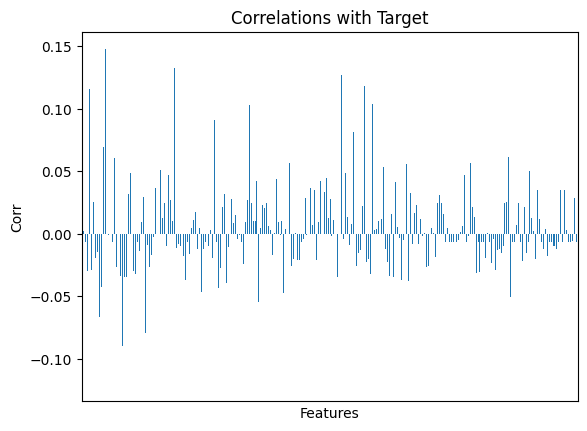

In [21]:
# Calculate the correlation between each column of main_df and target_column
correlations = X.corrwith(y)

# Correlations with Target
correlations.plot(kind='bar')
plt.title('Correlations with Target')
plt.xlabel('Features')
plt.xticks([])
plt.ylabel('Corr')
plt.show()

### VarianceThreshold

In [12]:
from sklearn.feature_selection import VarianceThreshold

# Remove low variance features
selection = VarianceThreshold(threshold=(0.05)) #? 0.1
X_transformed = selection.fit_transform(X)

selected_columns = list(X.columns[selection.get_support()])
print('len:', len(selected_columns), selected_columns)


len: 117 ['Feature_3', 'Feature_4', 'Feature_5', 'Feature_7', 'Feature_10', 'Feature_29', 'Feature_35', 'Feature_40', 'Feature_48', 'Feature_56', 'Feature_59', 'Feature_64', 'Feature_65', 'Feature_73', 'Feature_74', 'Feature_75', 'Feature_76', 'Feature_77', 'Feature_92', 'Feature_93', 'Feature_94', 'Feature_100', 'Feature_116', 'Feature_122', 'Feature_129', 'Feature_131', 'Feature_138', 'Feature_144', 'Feature_146', 'Feature_150', 'Feature_161', 'Feature_162', 'Feature_163', 'Feature_169', 'Feature_170', 'Feature_180', 'Feature_192', 'Feature_198', 'Feature_213', 'Feature_228', 'Feature_235', 'Feature_236', 'Feature_239', 'Feature_250', 'Feature_262', 'Feature_278', 'Feature_279', 'Feature_288', 'Feature_293', 'Feature_340', 'Feature_348', 'Feature_352', 'Feature_360', 'Feature_367', 'Feature_433', 'Feature_435', 'Feature_439', 'Feature_442', 'Feature_444', 'Feature_449', 'Feature_464', 'Feature_465', 'Feature_467', 'Feature_469', 'Feature_473', 'Feature_474', 'Feature_480', 'Feature_4

In [17]:
# Save list of features for the model
joblib.dump(selected_columns, '../models/list_of_features.joblib')
joblib.dump(X_transformed, '../data/X_training.joblib')
joblib.dump(y, '../data/y_training.joblib')

['../data/y_training.joblib']

In [19]:
print(len(selected_columns))

117
